In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from category_encoders.target_encoder import TargetEncoder 
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import os.path
from datetime import date
from datetime import datetime

In [174]:
filepath = 'data/train.csv'
df = pd.read_csv(filepath)

# EDA

In [4]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df.shape

(15120, 56)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [7]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
def stat(df):
    type_list = df.dtypes
    df_stat = pd.DataFrame(type_list,columns=["data types"])
    df_stat['Missing'] = df.isnull().sum()
    df_stat['unique'] = df.nunique()
    return df_stat
df_stat = stat(df).style.background_gradient(cmap='rainbow')
df_stat

,data types,Missing,unique
Id,int64,0,15120
Elevation,int64,0,1665
Aspect,int64,0,361
Slope,int64,0,52
Horizontal_Distance_To_Hydrology,int64,0,400
Vertical_Distance_To_Hydrology,int64,0,423
Horizontal_Distance_To_Roadways,int64,0,3250
Hillshade_9am,int64,0,176
Hillshade_Noon,int64,0,141
Hillshade_3pm,int64,0,247


int64    56
dtype: int64

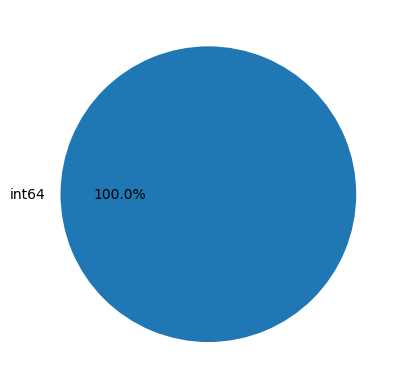

In [10]:
df.dtypes.value_counts().plot(kind="pie",autopct='%.1f%%')
df.dtypes.value_counts()

In [18]:
# sns.heatmap(, annot=True, cmap='rainbow')
corr = df.drop(['Id'], axis=1).corr().style.background_gradient(cmap='rainbow')
corr

c:\Python311\Lib\site-packages\pandas\io\formats\style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Python311\Lib\site-packages\pandas\io\formats\style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563,0.330417,0.261729,0.354025,-0.783651,-0.218818,-0.147947,-0.307523,-0.125342,-0.141478,-0.187354,nan,0.002934,-0.010571,-0.357816,-0.037906,0.017432,0.039304,-0.140619,nan,-0.066252,-0.200663,-0.035173,0.029808,0.008548,0.032509,0.146236,0.159872,0.097647,0.010586,0.020669,0.040019,-0.001077,0.165304,0.048204,0.093191,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238,0.032578,0.075228,-0.024538,-0.020970,-0.069120,0.018019,0.000343,-0.006066,nan,0.001723,-0.019391,0.111959,-0.034549,-0.044142,0.024312,0.001181,nan,0.027121,0.029870,-0.042140,0.007570,-0.023330,0.018815,0.022301,0.041880,0.005480,-0.002340,-0.009775,0.018986,0.026330,-0.063428,-0.086897,0.008160,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527,-0.152820,-0.065923,-0.113033,0.286985,0.099355,-0.081498,0.265541,0.087841,0.074720,-0.047868,nan,-0.012989,-0.022220,0.255804,-0.109798,-0.115088,0.119863,-0.054085,nan,-0.064321,-0.124375,-0.069326,-0.047742,-0.068508,-0.033935,-0.076393,-0.184528,0.017982,0.011062,-0.030700,0.012295,0.036082,-0.083108,0.118725,-0.076851,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484,0.200532,-0.239303,-0.084766,0.024234,-0.089578,-0.059398,-0.025247,0.021203,nan,0.002819,-0.005523,-0.112852,0.026150,0.034306,0.026595,-0.111878,nan,-0.084804,-0.159717,-0.018282,-0.033946,-0.062873,-0.025207,-0.007840,-0.087963,0.046915,-0.004615,0.027879,0.064616,0.019663,0.033854,-0.032540,0.060886,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108,0.069884,0.027321,-0.034309,0.005436,0.070414,-0.016543,0.018550,0.094701,nan,-0.007049,-0.014610,0.018305,-0.029364,-0.033237,0.085309,-0.087445,nan,-0.070201,-0.155574,-0.039745,-0.040898,-0.065710,-0.022197,-0.064122,-0.144317,0.017148,-0.011697,-0.016315,0.047304,0.046287,-0.056267,-0.000083,0.006247,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,0.367786,-0.080758,0.124378,-0.440454,-0.122634,-0.092474,-0.159434,-0.094919,-0.091419,-0.135266,nan,0.018481,-0.019055,-0.213057,-0.079474,0.076984,0.002317,-0.071706,nan,-0.014958,-0.080802,-0.041192,0.059096,0.046444,-0.004712,0.107962,0.132568,0.022445,-0.006635,0.025094,0.027413,-0.011532,0.265508,-0.062701,0.026668,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.0000

In [25]:
def generate_solid_Type(df:pd.Series):
    Soil_cols = [col for col in df.columns if col[:4] == 'Soil']
    # df_soil = df[Soil_cols]
    Soil_Type = []
    for i in range(df.shape[0]):
        find = False 
        for j in range(1, 41):
            if df.iloc[i, j] == 1:
                Soil_Type.append(j)
                find = True
            if find:
                break
    Soil_Type = pd.Series(Soil_Type)
    return Soil_Type
Soil_Type = generate_solid_Type(df)
print(Soil_Type.value_counts())
print(Soil_Type.shape)

13    6236
14    4629
11    3503
12     489
5      136
3       78
2       48
9        1
dtype: int64
(15120,)


In [26]:
# Soil type for test data
test_filepath = 'data/test.csv'
df_test = pd.read_csv(test_filepath)
Soil_Type = generate_solid_Type(df_test)
print(Soil_Type.value_counts())
print(Soil_Type.shape)

11    250665
13    242534
14     31974
12     28815
5       6665
3       3602
2       1623
9         14
dtype: int64
(565892,)


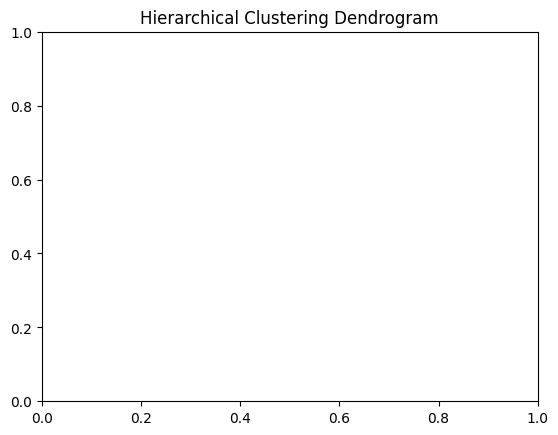

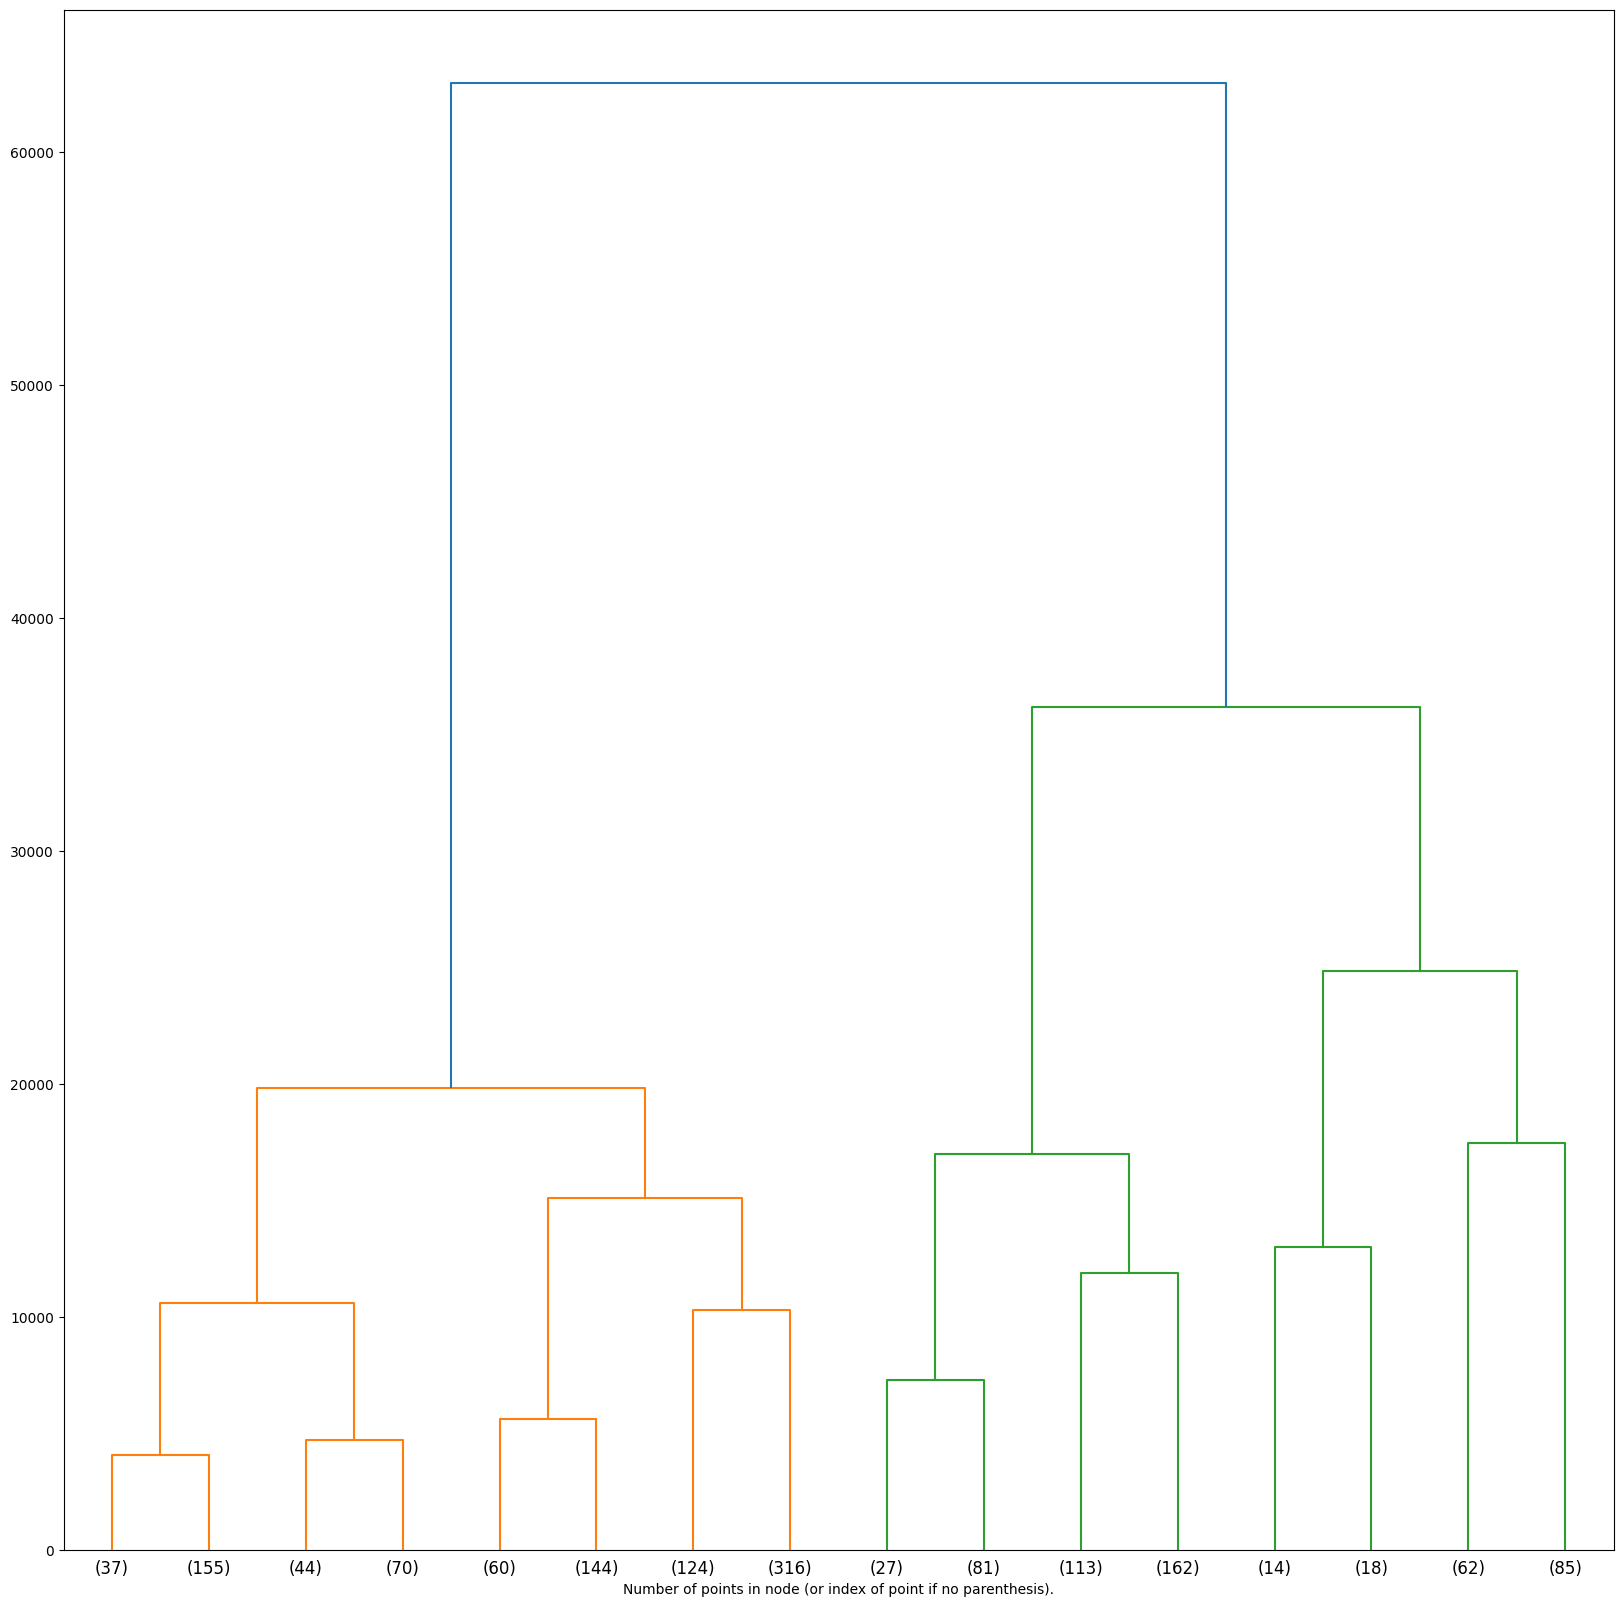

In [30]:
# clustering for feature creation
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
# take a bit of data for test 
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

x1, x2, y1, y2 = train_test_split(df.drop(['Id', 'Cover_Type'], axis=1), df['Cover_Type'], train_size=0.1)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(x1)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

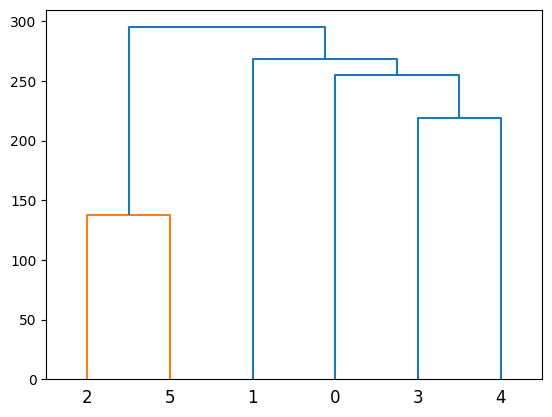

In [31]:
from scipy.cluster import hierarchy 
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,
                   400., 754., 564., 138., 219., 869., 669.])
Z = hierarchy.linkage(ytdist, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

C:\Users\User\AppData\Local\Temp\ipykernel_11008\276194814.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wild_soil.drop(['Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)


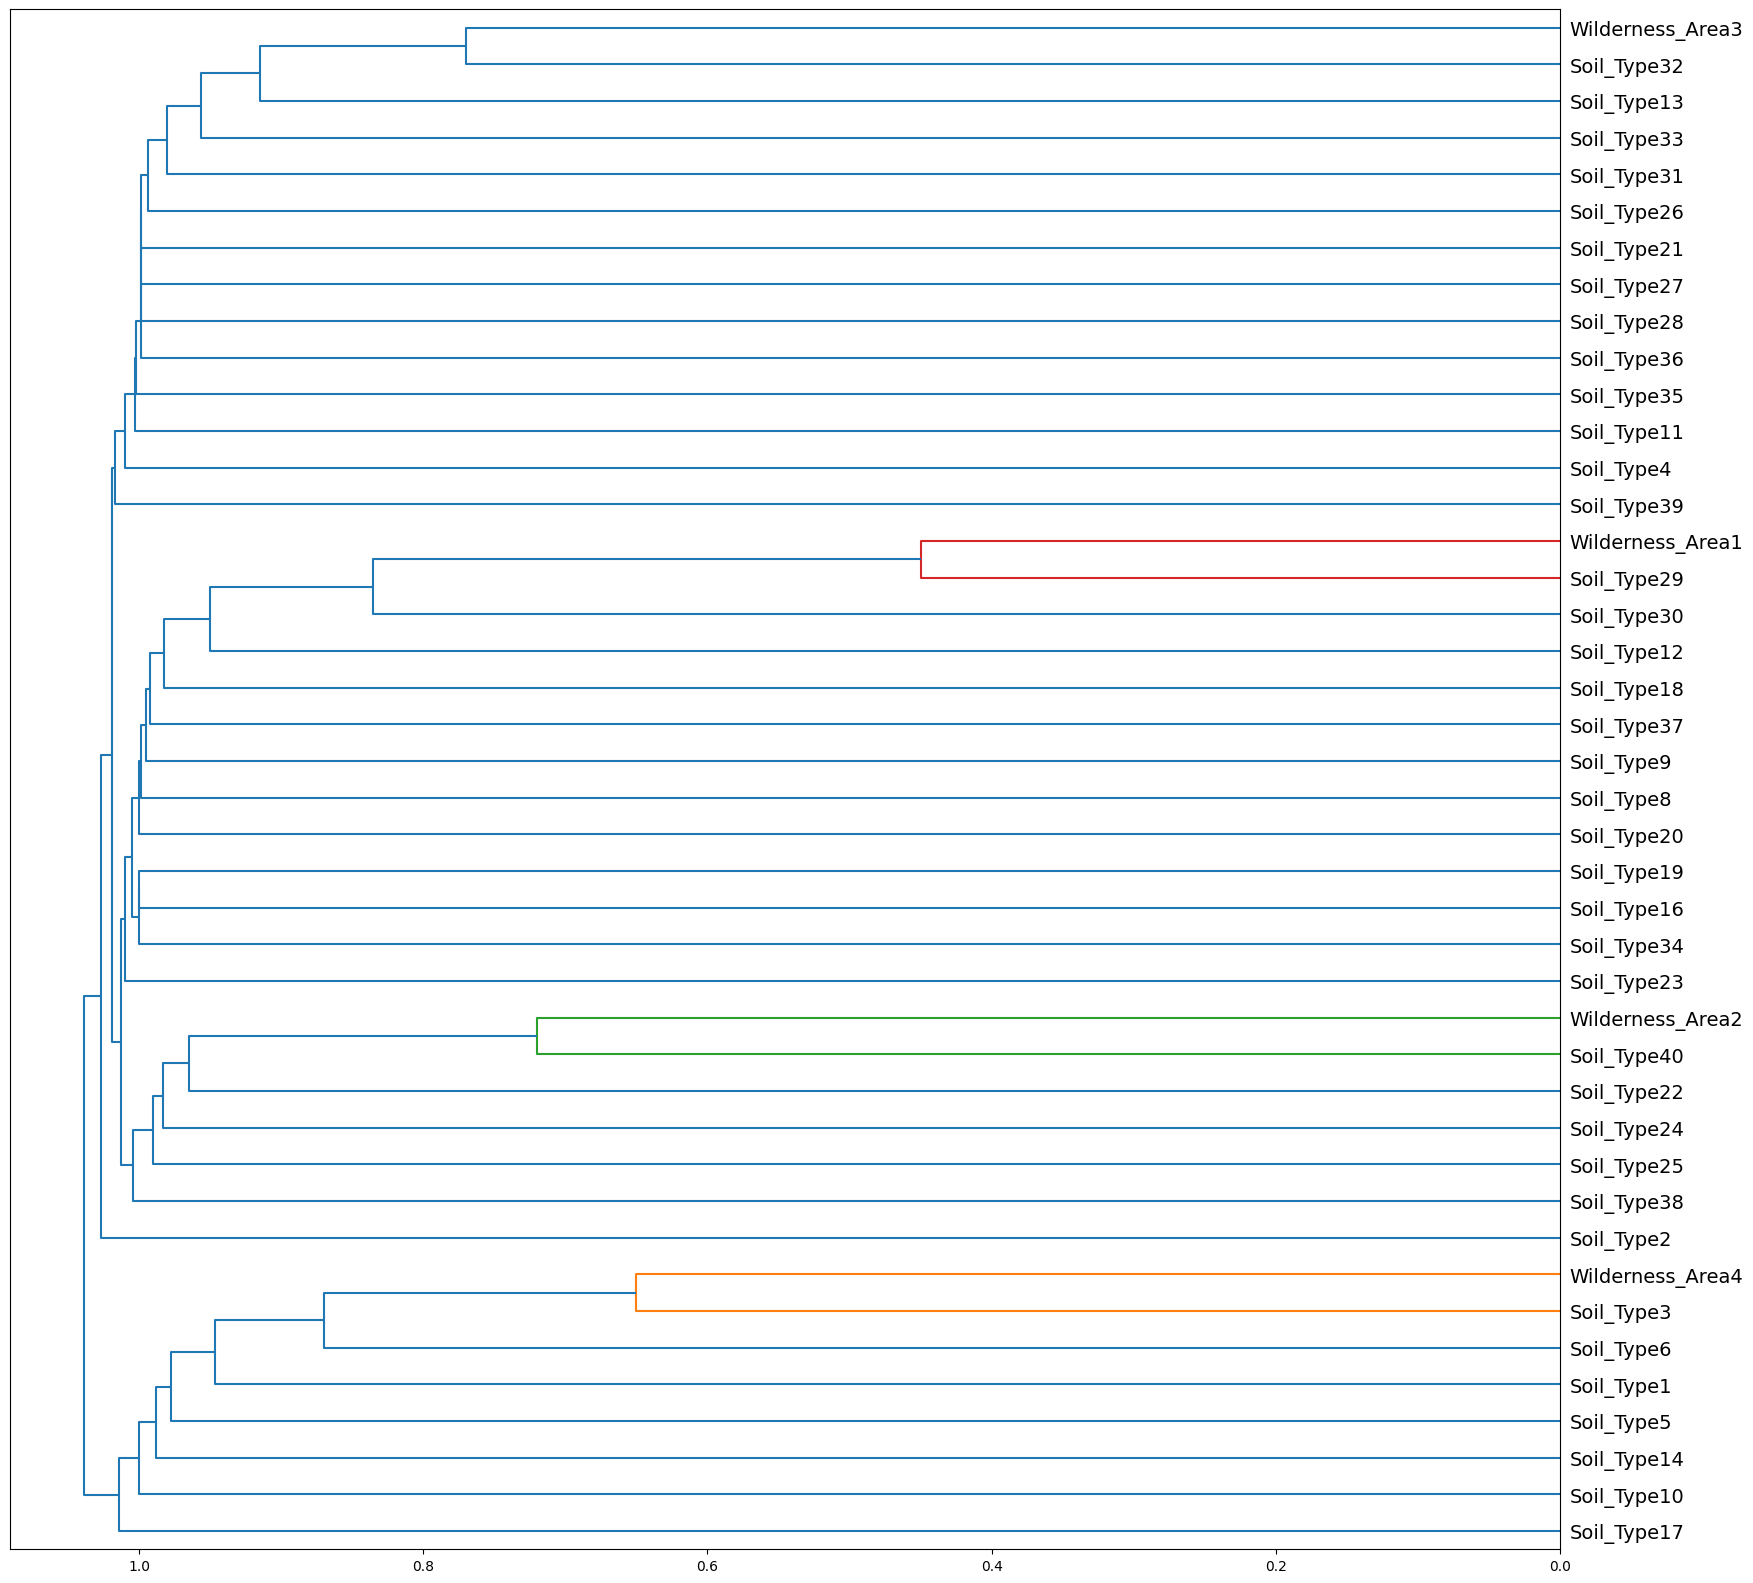

In [194]:
# hierarchical cluster: wilderness & soil type
from scipy import stats
from scipy.cluster import hierarchy as hc
soil_cols = []
wild_cols = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
for col in df.columns:
    if col[:4] == 'Soil':
        soil_cols.append(col)
for col in wild_cols:
    soil_cols.append(col)
df_wild_soil = df[soil_cols]
df_wild_soil.drop(['Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)

corr = np.round(stats.spearmanr(df_wild_soil).correlation, 2)
plt.figure(figsize=(20,20))
hc.dendrogram(hc.linkage(hc.distance.squareform(1-corr), 
                         method='average'), 
              labels=df_wild_soil.columns, orientation='left', 
              leaf_font_size=14)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11008\3546431459.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(['Id', 'Cover_Type'], axis=1, inplace=True)


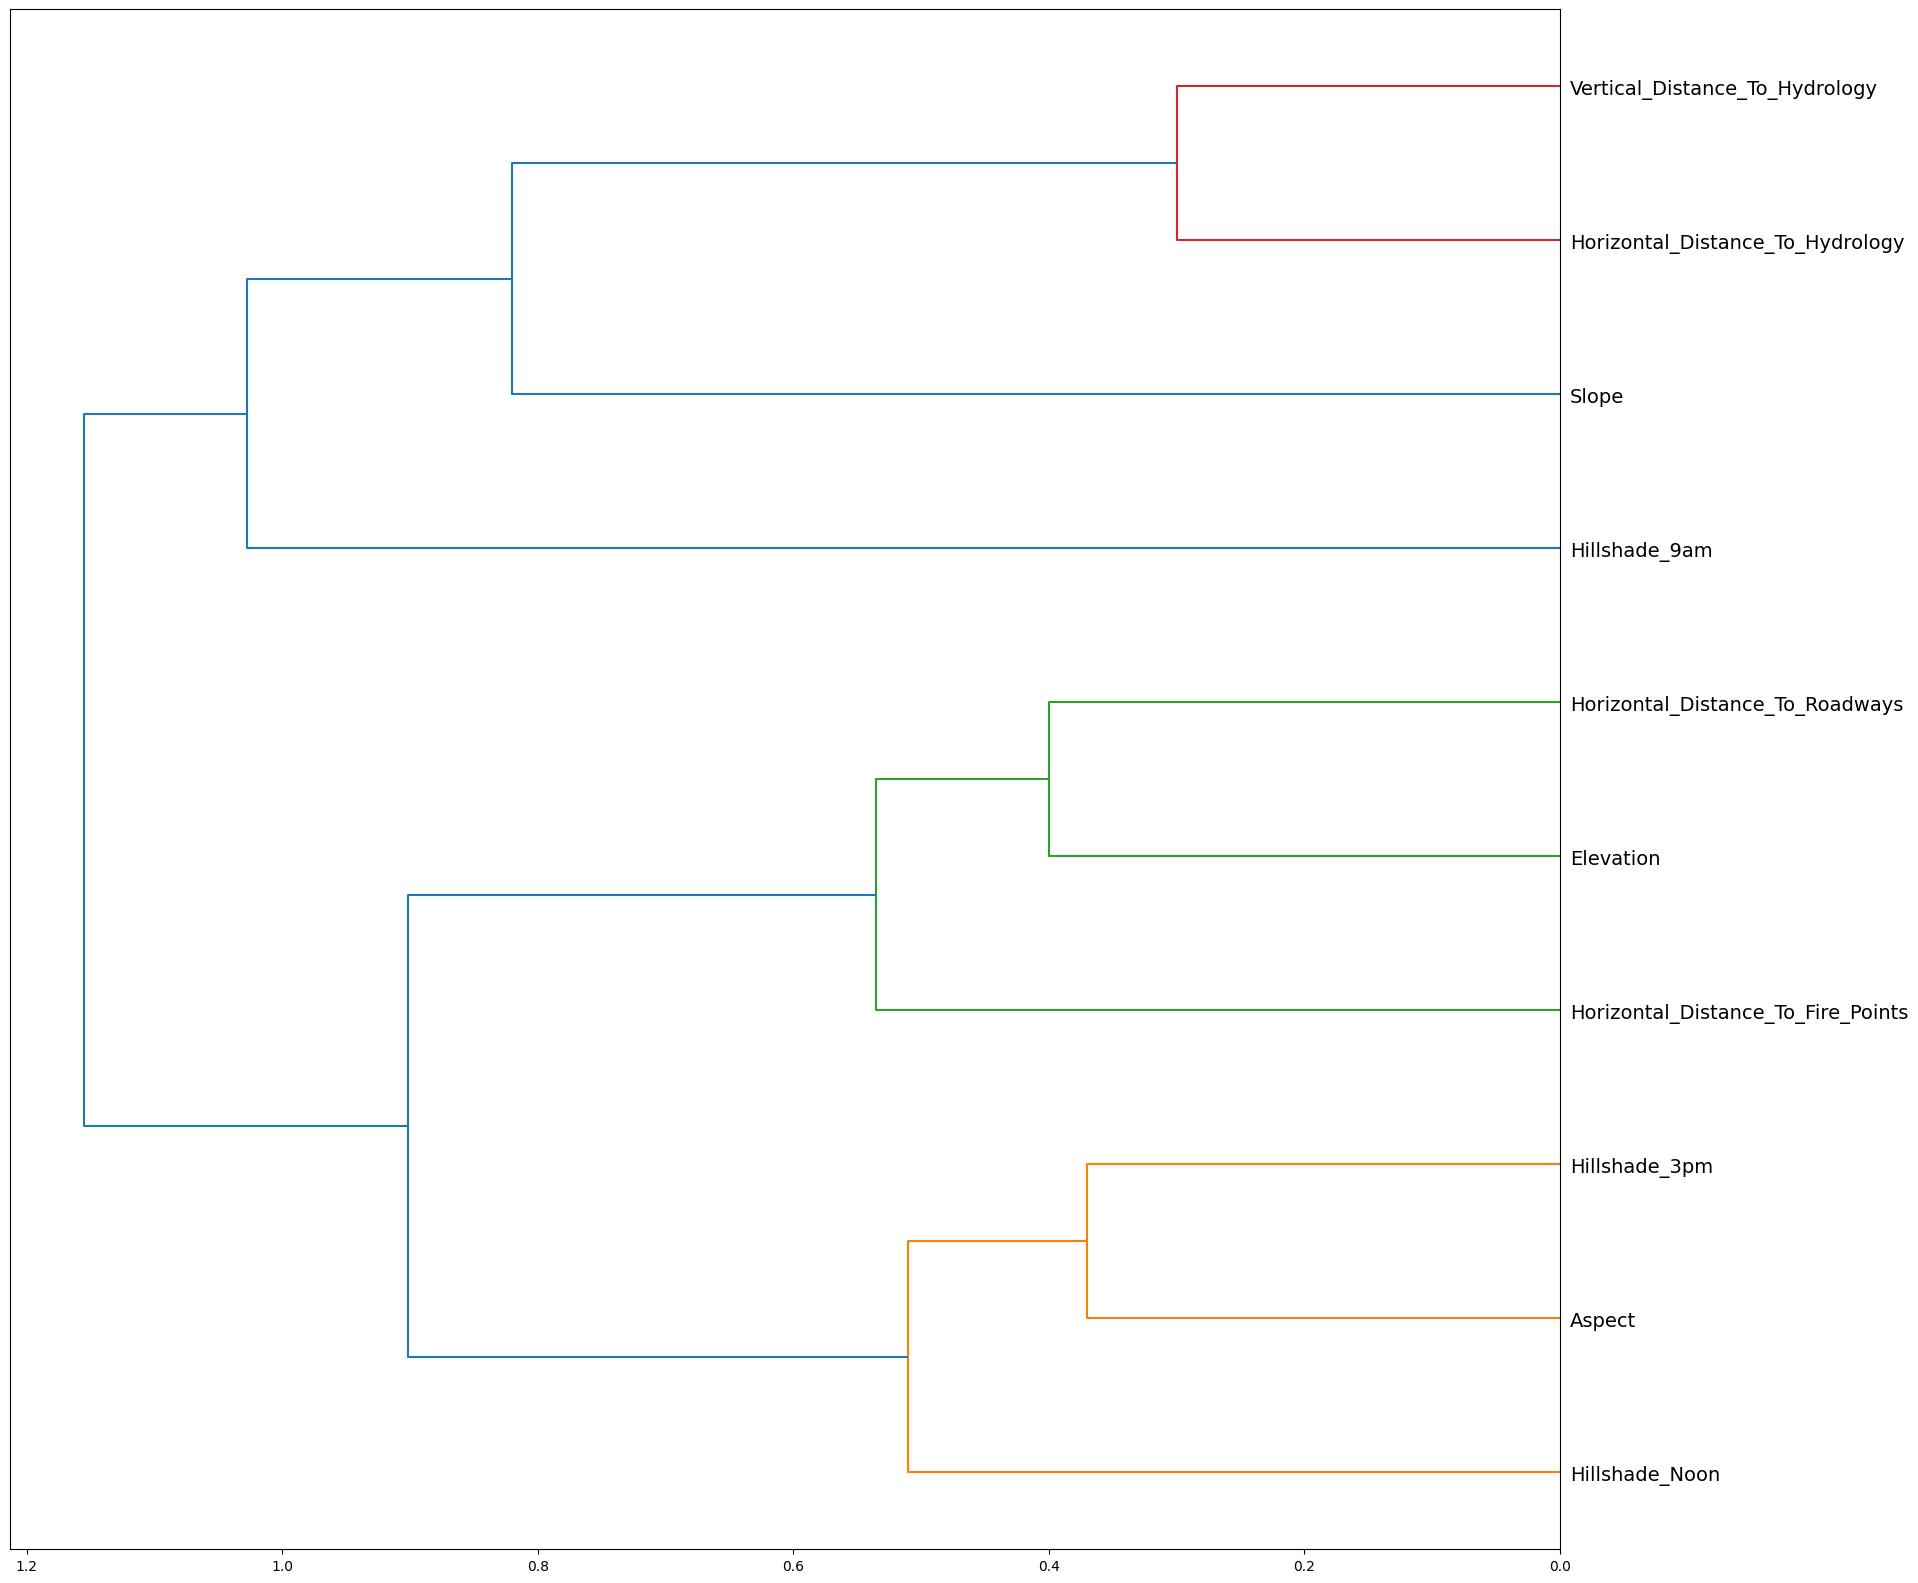

In [197]:
from scipy import stats
from scipy.cluster import hierarchy as hc

cols = []
for col in df.columns:
    if col[:4] == 'Soil': continue
    if col.split('_')[0] == 'Wilderness': continue
    cols.append(col)
df_copy = df[cols]
df_copy.drop(['Id', 'Cover_Type'], axis=1, inplace=True)
corr = np.round(stats.spearmanr(df_copy).correlation, 2)

plt.figure(figsize=(20,20))
# hc.distance.squareform(1-corr)
hc.dendrogram(hc.linkage(hc.distance.squareform(1-corr), 
                         method='weighted'), 
              labels=df_copy.columns, orientation='left', 
              leaf_font_size=14)
plt.show()

NA column:  Index(['Soil_Type15', 'Soil_Type7'], dtype='object')
[1.01 1.31 0.62 ... 1.05 1.04 1.04]
(1326,)


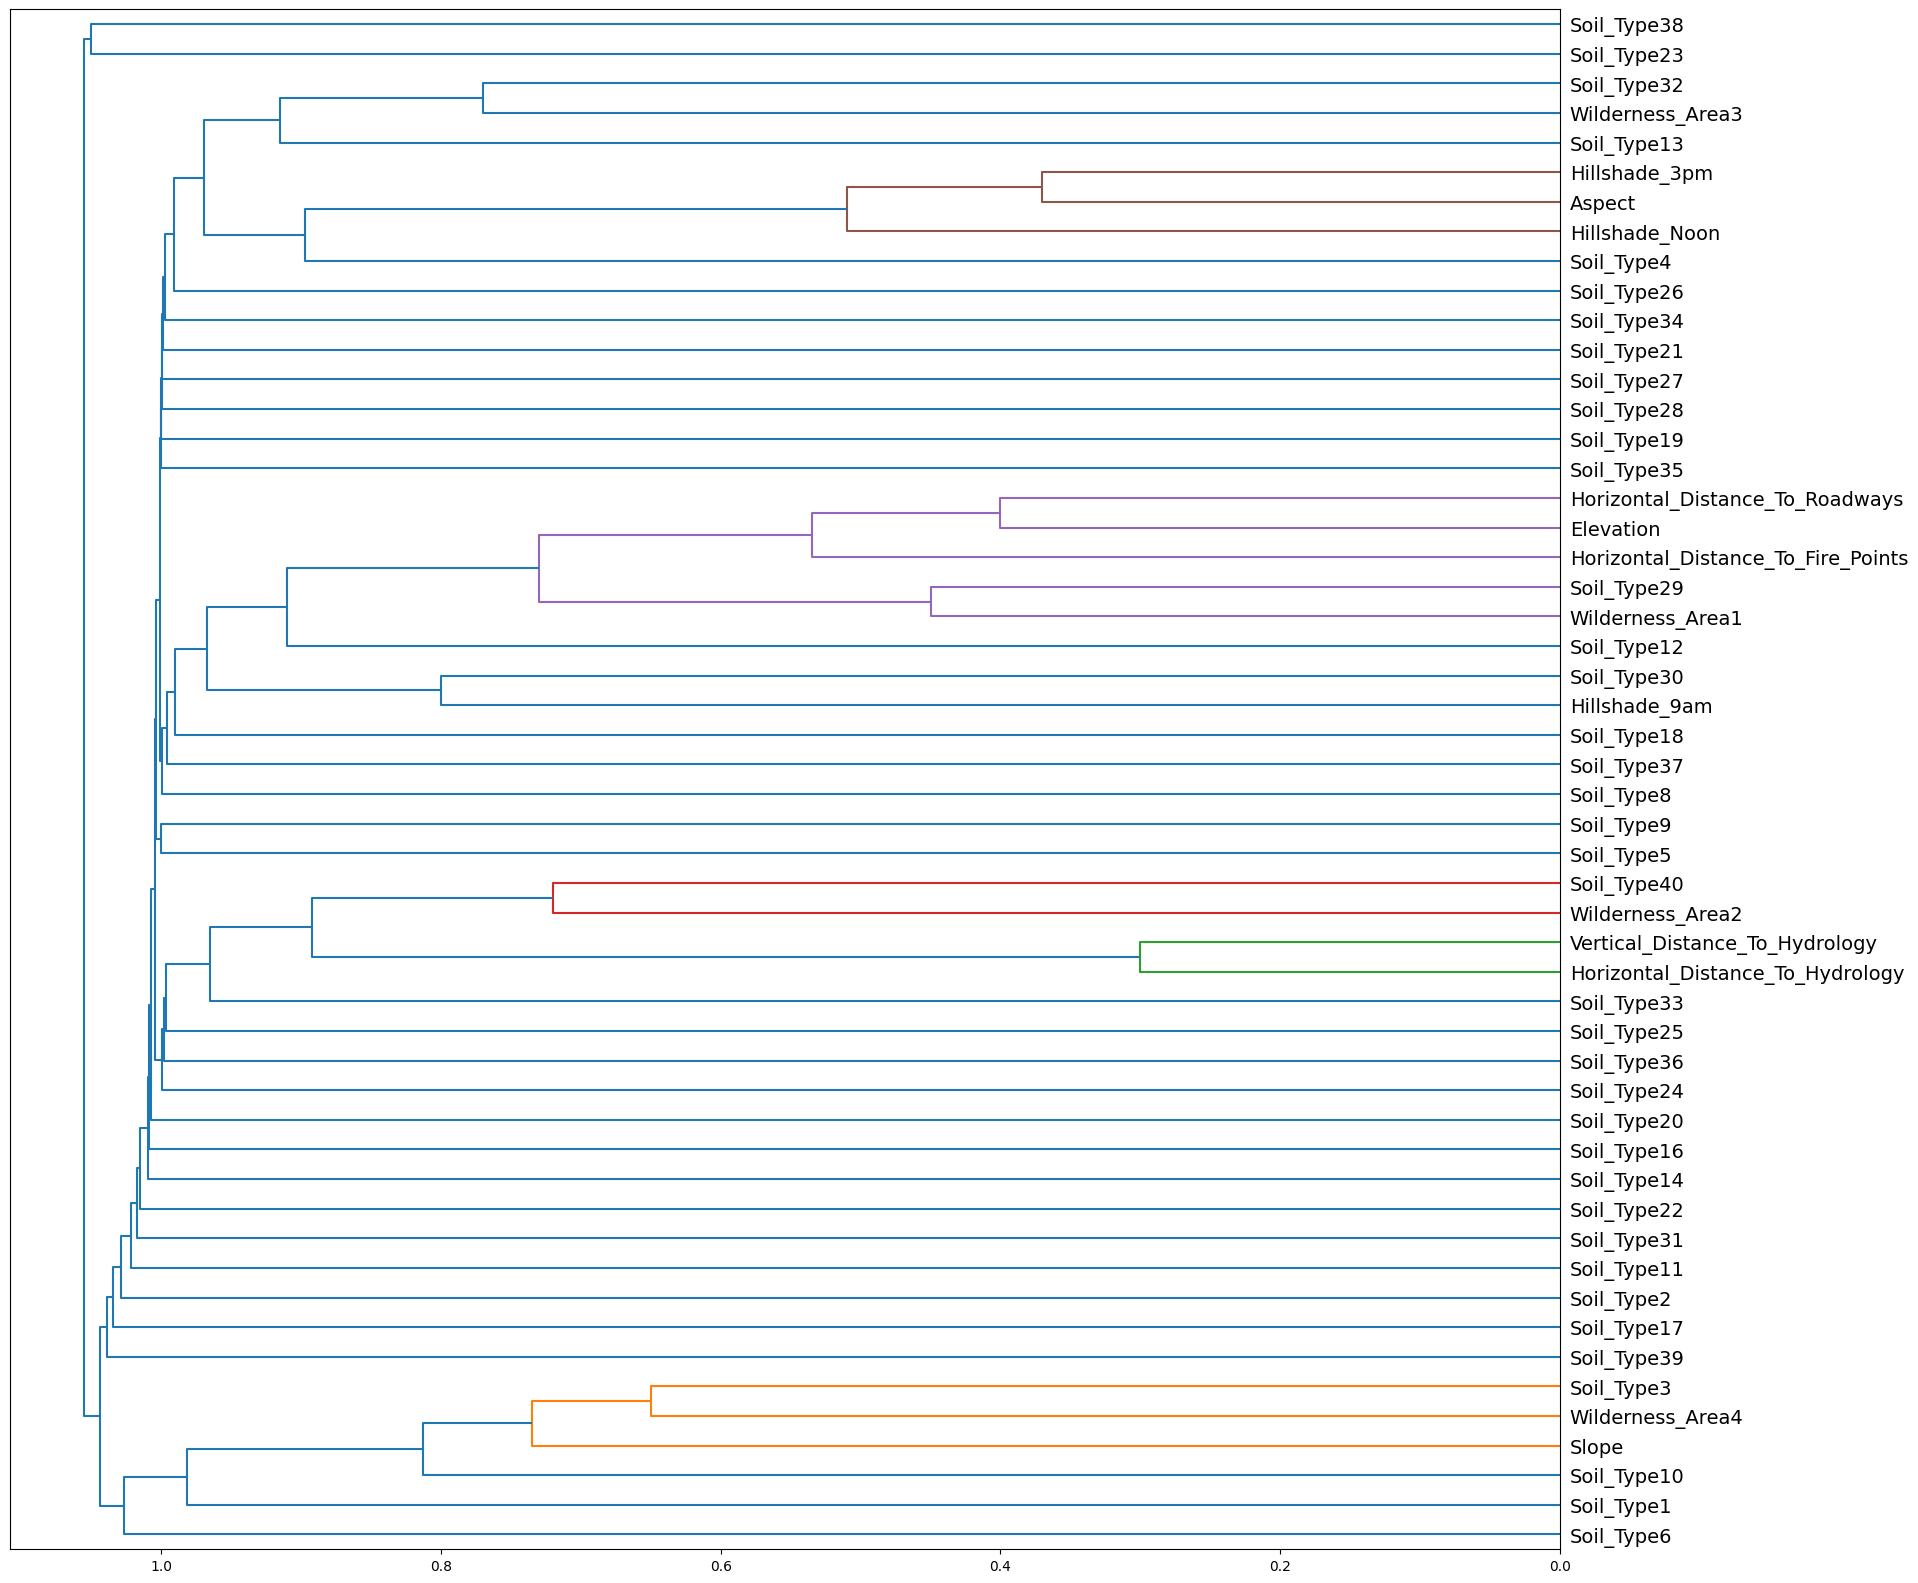

In [172]:
from scipy import stats
from scipy.cluster import hierarchy as hc
print('NA column: ', df.columns[[29, 21]])
df_copy = df.drop(df.columns[[29, 21]], axis=1)
# df_copy = df.copy()
df_copy.drop(['Id', 'Cover_Type'], axis=1, inplace=True)
corr = np.round(stats.spearmanr(df_copy).correlation, 2)
pd.DataFrame(corr)
print(hc.distance.squareform(1-corr))
print(hc.distance.squareform(1-corr).shape)
# 20, 21, 28, 34, 38
# print(np.argwhere(np.isnan(corr))[:,0])
plt.figure(figsize=(20,20))
# hc.distance.squareform(1-corr)
hc.dendrogram(hc.linkage(hc.distance.squareform(1-corr), 
                         method='weighted'), 
              labels=df_copy.columns, orientation='left', 
              leaf_font_size=14)
plt.show()

In [313]:
# test for baseline 
from xgboost import XGBClassifier

data, target = df.drop(['Id', 'Cover_Type'], axis=1), df['Cover_Type']
x1_, x2_, y1_, y2_ = train_test_split(data, target, random_state=42)
y1_ -= 1
y2_ -= 1 

eval_set = [(x1_, y1_), (x2_, y2_)]
xgb = XGBClassifier(eval_metric=['merror', 'mlogloss'])
xgb.fit(x1_, y1_, eval_set = eval_set, verbose=True, early_stopping_rounds=10)

[0]	validation_0-merror:0.24277	validation_0-mlogloss:1.41993	validation_1-merror:0.27169	validation_1-mlogloss:1.43848
[1]	validation_0-merror:0.21940	validation_0-mlogloss:1.16493	validation_1-merror:0.25714	validation_1-mlogloss:1.20019
[2]	validation_0-merror:0.20714	validation_0-mlogloss:0.99469	validation_1-merror:0.24788	validation_1-mlogloss:1.03946
[3]	validation_0-merror:0.19815	validation_0-mlogloss:0.87539	validation_1-merror:0.23915	validation_1-mlogloss:0.92643


c:\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-merror:0.19268	validation_0-mlogloss:0.78822	validation_1-merror:0.23651	validation_1-mlogloss:0.84543
[5]	validation_0-merror:0.19012	validation_0-mlogloss:0.72090	validation_1-merror:0.23413	validation_1-mlogloss:0.78101
[6]	validation_0-merror:0.18624	validation_0-mlogloss:0.66513	validation_1-merror:0.22937	validation_1-mlogloss:0.72945
[7]	validation_0-merror:0.18377	validation_0-mlogloss:0.62181	validation_1-merror:0.22778	validation_1-mlogloss:0.69113
[8]	validation_0-merror:0.17822	validation_0-mlogloss:0.58191	validation_1-merror:0.21905	validation_1-mlogloss:0.65613
[9]	validation_0-merror:0.17469	validation_0-mlogloss:0.55195	validation_1-merror:0.21587	validation_1-mlogloss:0.62953
[10]	validation_0-merror:0.16984	validation_0-mlogloss:0.52523	validation_1-merror:0.21243	validation_1-mlogloss:0.60726
[11]	validation_0-merror:0.16596	validation_0-mlogloss:0.50390	validation_1-merror:0.20767	validation_1-mlogloss:0.58905
[12]	validation_0-merror:0.15970	valid

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

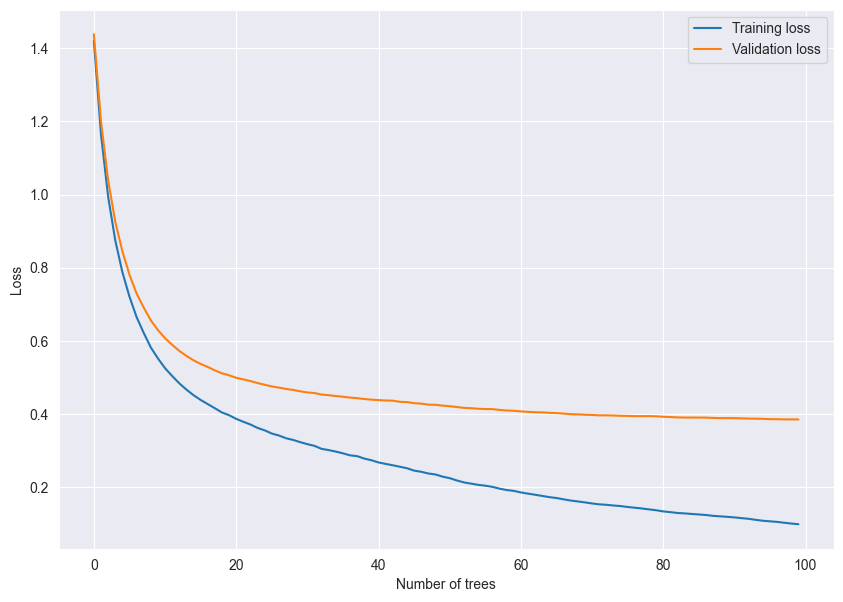

In [314]:
results = xgb.evals_result()
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
# plt.axvline(20, color="gray", label="Optimal tree number")
# plt.ylim(0.01, 0.05)
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [315]:
# 
pred = xgb.predict(x1_)
print('train acc: ', accuracy_score(y1_, pred))
pred = xgb.predict(x2_)
print('test acc: ', accuracy_score(y2_, pred))

# baseline 測試分數：acc 84.8%

train acc:  0.9910934744268077
test acc:  0.8552910052910053


In [316]:
np.mean(cross_val_score(xgb, x2_, y2_, cv=5))

0.7999999999999999

In [413]:
# sumation
from sklearn.preprocessing import MinMaxScaler
def minmaxscale(data:pd.Series):
    scaler = MinMaxScaler(feature_range=(0,1)).fit([data])
    return scaler.transform([data])[0]

def feature_creat(df:pd.DataFrame):
    df['Hillshade'] = df['Hillshade_3pm'] + df['Hillshade_9am'] + df['Hillshade_Noon']
    df['Distance_To_Hydrology'] = abs(df['Vertical_Distance_To_Hydrology']) + abs(df['Horizontal_Distance_To_Hydrology'])
    df['Distance_Roadways_FirPoints'] = df['Horizontal_Distance_To_Roadways'] + df['Horizontal_Distance_To_Fire_Points']
    df['Distance_Roadways-FirPoints'] = df['Horizontal_Distance_To_Roadways'] - df['Horizontal_Distance_To_Fire_Points']

    df['binned_elev'] = [math.floor(v/50.0) for v in df['Elevation']]
    df['Ele_Hillshade'] = df['Elevation'] - df['Hillshade']
    df['Ele-Hillshade'] = df['Elevation'] + df['Hillshade']

    # area
    df['Wilderness_Area1_soil'] = df['Wilderness_Area1'] + df['Soil_Type29']
    df['Wilderness_Area2_soil'] = df['Wilderness_Area2'] + df['Soil_Type40']
    df['Wilderness_Area3_soil'] = df['Wilderness_Area3'] + df['Soil_Type32']
    df['Wilderness_Area4_soil'] = df['Wilderness_Area4'] + df['Soil_Type3'] # 較不顯著

    # Elevation 
    df['Elevation_FirePoint'] = df['Elevation'] + df['Horizontal_Distance_To_Fire_Points']
    df['Elevation-FirePoint'] = df['Elevation'] - df['Horizontal_Distance_To_Fire_Points']

    df['Elevation_Road'] = df['Elevation'] + df['Horizontal_Distance_To_Roadways']
    df['Elevation-Road'] = df['Elevation'] - df['Horizontal_Distance_To_Roadways']

    # Slope...
    df['binned_Slope'] = [math.floor(v/2.60) for v in df['Slope']]
    df['binned_Aspect'] = [math.floor(v/18.0) for v in df['Aspect']]
    Slope = minmaxscale(df['Slope'])
    Distance_To_Hydrology = minmaxscale(df['Distance_To_Hydrology'])
    Aspect = minmaxscale(df['Aspect'])
    Hillshade = minmaxscale(df['Hillshade'])

    df['Slope_Hydrology'] = Slope + Distance_To_Hydrology
    df['Slope-Hydrology'] = Slope - Distance_To_Hydrology
    df['Slope_Hillshade'] = Slope + Hillshade
    df['Slope-Hillshade'] = Slope - Hillshade
    # Aspect...
    
    df['Aspect_Hillshade'] = Aspect + Hillshade
    df['Aspect-Hillshade'] = Aspect - Hillshade

    # cols = df.columns
    # df["mean"] = df[cols].mean(axis=1)
    # df["min"] = df[cols].min(axis=1)
    # df["max"] = df[cols].max(axis=1)
    # df["std"] = df[cols].std(axis=1)
    
    return df 

import math
def feature_creation(data:pd.DataFrame):
    data['Hillshade'] = data['Hillshade_9am'] + data['Hillshade_3pm'] + data['Hillshade_Noon']
    data['binned_elev'] = [math.floor(v/50.0) for v in data['Elevation']]
    data['Elevation_Fire_Points'] = data['Elevation'] + data['Horizontal_Distance_To_Fire_Points']
    data['Road_Fire'] = data['Horizontal_Distance_To_Roadways'] + data['Horizontal_Distance_To_Fire_Points']
    data['Road-Fire'] = data['Horizontal_Distance_To_Roadways'] - data['Horizontal_Distance_To_Fire_Points']
    data['Ele_Road_Fire_Hydro'] = data['Elevation'] + data['Horizontal_Distance_To_Roadways']  + data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Hydrology']
    data['Ele-Road'] = data['Elevation'] + data['Horizontal_Distance_To_Roadways']
    data['Ele_Road'] = data['Elevation'] - data['Horizontal_Distance_To_Roadways']
    data['Ele-Fire'] = data['Elevation'] + data['Horizontal_Distance_To_Fire_Points']
    data['Ele_Fire'] = data['Elevation'] - data['Horizontal_Distance_To_Fire_Points']
    data['Ele_Hillshade'] = data['Elevation'] - data['Hillshade']
    data['Ele-Hillshade'] = data['Elevation'] + data['Hillshade']
    #None elevation combos:
    data['Soil_W1'] = data['Soil_Type29'] + data['Wilderness_Area1']
    data['Soil_W4'] = data['Wilderness_Area4'] + data['Soil_Type3']
    data['Hydrology_Total'] = abs(data["Horizontal_Distance_To_Hydrology"])+abs(data['Vertical_Distance_To_Hydrology'])
    #Summary metrics
    data["mean"] = data[cols].mean(axis=1)
    data["min"] = data[cols].min(axis=1)
    data["max"] = data[cols].max(axis=1)
    data["std"] = data[cols].std(axis=1)
    return data

df_copy = feature_creation(df.copy().drop(['Id'], axis=1))
df_copy.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [336]:
# directly use these features 
from mlxtend.feature_selection import SequentialFeatureSelector
from xgboost import XGBClassifier
sns.set_style('darkgrid')
df_copy = feature_creat(df.copy().drop(['Id'], axis=1))
data, target = df_copy.drop(['Cover_Type'], axis=1), df['Cover_Type']
x1, x2, y1, y2 = train_test_split(data, target, random_state=42)
y1 -= 1
y2 -= 1
eval_set = [(x1, y1), (x2, y2)]
xgb = XGBClassifier(eval_metric=['merror', 'mlogloss'])
xgb.fit(x1, y1, eval_set = eval_set, verbose=True, early_stopping_rounds=10)

[0]	validation_0-merror:0.22496	validation_0-mlogloss:1.40538	validation_1-merror:0.25265	validation_1-mlogloss:1.42515
[1]	validation_0-merror:0.21340	validation_0-mlogloss:1.14808	validation_1-merror:0.23995	validation_1-mlogloss:1.18213


c:\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-merror:0.20018	validation_0-mlogloss:0.97665	validation_1-merror:0.23069	validation_1-mlogloss:1.01977
[3]	validation_0-merror:0.18818	validation_0-mlogloss:0.85286	validation_1-merror:0.22407	validation_1-mlogloss:0.90481
[4]	validation_0-merror:0.18183	validation_0-mlogloss:0.76078	validation_1-merror:0.21905	validation_1-mlogloss:0.81981
[5]	validation_0-merror:0.17425	validation_0-mlogloss:0.68959	validation_1-merror:0.21614	validation_1-mlogloss:0.75452
[6]	validation_0-merror:0.16728	validation_0-mlogloss:0.63255	validation_1-merror:0.21349	validation_1-mlogloss:0.70284
[7]	validation_0-merror:0.15661	validation_0-mlogloss:0.58137	validation_1-merror:0.20873	validation_1-mlogloss:0.65791
[8]	validation_0-merror:0.15238	validation_0-mlogloss:0.54484	validation_1-merror:0.20212	validation_1-mlogloss:0.62517
[9]	validation_0-merror:0.14841	validation_0-mlogloss:0.51441	validation_1-merror:0.19656	validation_1-mlogloss:0.59893
[10]	validation_0-merror:0.14427	validat

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

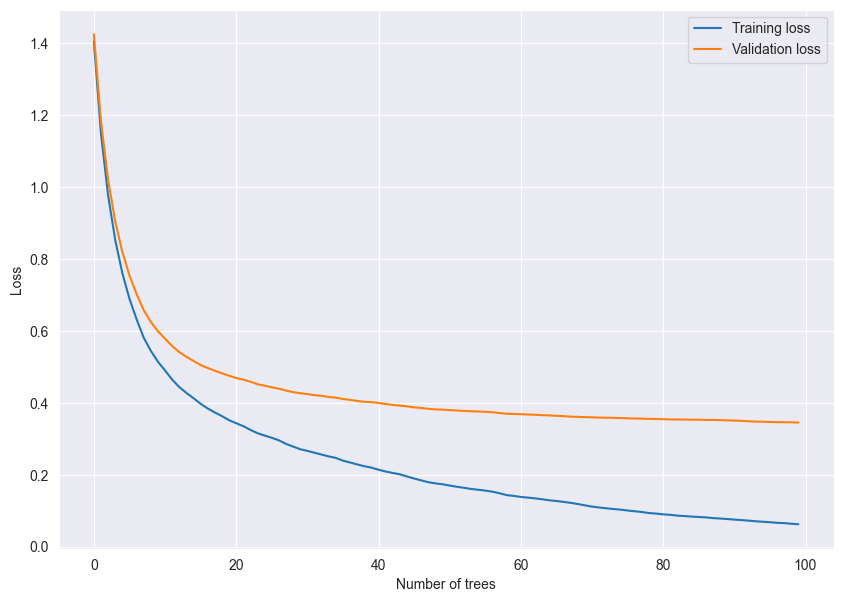

In [337]:
results = xgb.evals_result()
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
# plt.axvline(20, color="gray", label="Optimal tree number")
# plt.ylim(0.01, 0.05)
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [368]:
# test other model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LassoCV, RidgeClassifierCV
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
hgb = HistGradientBoostingClassifier()
et = ExtraTreesClassifier()

# lr = LogisticRegressionCV(max_iter=300)

sns.set_style('darkgrid')
df_copy = feature_creat(df.copy().drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis=1))
data, target = df_copy.drop(['Cover_Type'], axis=1), df['Cover_Type']
x1, x2, y1, y2 = train_test_split(data, target, random_state=42)
y1 -= 1
y2 -= 1
et.fit(x1, y1)
rf.fit(x1, y1)
knn.fit(x1, y1)
hgb.fit(x1, y1)

HistGradientBoostingClassifier()

In [369]:
def score(model, x1, x2, y1, y2):
    pred = model.predict(x1)
    print('train acc: ', accuracy_score(y1, pred))
    pred = model.predict(x2)
    print('test acc: ', accuracy_score(y2, pred))
    print('cross validation score: ',np.mean(cross_val_score(model, x2, y2, cv=5)))

model = {
    'et':et,
    'rf':rf,
    'knn':knn,
    'hgb':hgb,
}
for m in model:
    print('for model {} : '.format(m))
    score(model[m], x1, x2, y1, y2)
    print('-'*20)

for model et : 
train acc:  1.0
test acc:  0.8912698412698413
cross validation score:  0.8224867724867725
--------------------
for model rf : 
train acc:  1.0
test acc:  0.8857142857142857
cross validation score:  0.8119047619047619
--------------------
for model knn : 
train acc:  0.872310405643739
test acc:  0.7928571428571428
cross validation score:  0.701058201058201
--------------------
for model hgb : 
train acc:  0.9865961199294533
test acc:  0.873015873015873
cross validation score:  0.8076719576719578
--------------------


In [370]:
# stacking 
from sklearn.ensemble import StackingClassifier
estimators = [
    ("xgb", xgb),
    ("hgb", hgb),
    ("rf", rf)
]
clf = StackingClassifier(estimators=estimators, final_estimator=et)
clf.fit(x1, y1).score(x2, y2)

0.8896825396825396

In [371]:
cv_score = cross_val_score(clf, x2, y2, cv=5)
np.mean(cv_score)
# score of stacking module: 80.55

0.8055555555555556

In [338]:
# after feature selection: 
pred = xgb.predict(x1)
print('train acc: ', accuracy_score(y1, pred))
pred = xgb.predict(x2)
print('test acc: ', accuracy_score(y2, pred))

train acc:  0.9982363315696648
test acc:  0.876984126984127


In [339]:
np.mean(cross_val_score(xgb, x2, y2, cv=5))
# training using extra features

0.8013227513227512

In [394]:
# with PCA 效果不好
import numpy as np
from sklearn.decomposition import PCA
df_test = df_copy.copy()
data, target = df_test.drop(['Cover_Type'], axis=1), df['Cover_Type']
pca = PCA(n_components=30)
pca.fit(data)
data = pca.transform(data)
# PCA(n_components=50)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)
x1, x2, y1, y2 = train_test_split(data, target, random_state=42)
y1 -= 1
y2 -= 1
eval_set = [(x1, y1), (x2, y2)]
xgb = XGBClassifier(eval_metric=['merror', 'mlogloss'])
xgb.fit(x1, y1, eval_set = eval_set, verbose=True, early_stopping_rounds=10)
pred = xgb.predict(x1)
print('train acc: ', accuracy_score(y1, pred))
pred = xgb.predict(x2)
print('test acc: ', accuracy_score(y2, pred))
cross_val_score(xgb, x2, y2, cv=5)

[0]	validation_0-merror:0.23616	validation_0-mlogloss:1.42965	validation_1-merror:0.27460	validation_1-mlogloss:1.45718


c:\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-merror:0.20961	validation_0-mlogloss:1.17727	validation_1-merror:0.25291	validation_1-mlogloss:1.22005
[2]	validation_0-merror:0.19753	validation_0-mlogloss:1.00215	validation_1-merror:0.23862	validation_1-mlogloss:1.05753
[3]	validation_0-merror:0.18501	validation_0-mlogloss:0.87546	validation_1-merror:0.23228	validation_1-mlogloss:0.94067
[4]	validation_0-merror:0.17231	validation_0-mlogloss:0.78196	validation_1-merror:0.22857	validation_1-mlogloss:0.85655
[5]	validation_0-merror:0.16596	validation_0-mlogloss:0.71115	validation_1-merror:0.22434	validation_1-mlogloss:0.79438
[6]	validation_0-merror:0.16023	validation_0-mlogloss:0.64962	validation_1-merror:0.21878	validation_1-mlogloss:0.73947
[7]	validation_0-merror:0.15132	validation_0-mlogloss:0.59749	validation_1-merror:0.21243	validation_1-mlogloss:0.69534
[8]	validation_0-merror:0.14462	validation_0-mlogloss:0.55799	validation_1-merror:0.21085	validation_1-mlogloss:0.66220
[9]	validation_0-merror:0.13765	validati

array([0.77645503, 0.77248677, 0.8042328 , 0.78306878, 0.80555556])

In [409]:
cols = []
for i in range(1, 41):
    cols.append('Soil_Type'+str(i))
df_Soil = df_copy[cols]
df_Soil['Cover_Type'] = df['Cover_Type']
d = df_Soil.groupby('Cover_Type').sum()
for c in cols:
    if c == 'Cover_Type': continue
    if (d[c] == 0).all():
        print('useless type: ', c)
# we can discard Soil_Type7, Soil_Type15

useless type:  Soil_Type7
useless type:  Soil_Type15


C:\Users\User\AppData\Local\Temp\ipykernel_11008\1852029165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Soil['Cover_Type'] = df['Cover_Type']


In [415]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LassoCV, RidgeClassifierCV
xgb = XGBClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
hgb = HistGradientBoostingClassifier()
et = ExtraTreesClassifier()

# lr = LogisticRegressionCV(max_iter=300)

sns.set_style('darkgrid')
df_copy = feature_creat(df.copy().drop(['Id'], axis=1))
data, target = df_copy.drop(['Cover_Type', 'Soil_Type7', 'Soil_Type15'], axis=1), df['Cover_Type']
x1, x2, y1, y2 = train_test_split(data, target, random_state=42)
y1 -= 1
y2 -= 1
xgb.fit(x1, y1)
et.fit(x1, y1)
rf.fit(x1, y1)
knn.fit(x1, y1)
hgb.fit(x1, y1)
model = {
    'xgb':xgb,
    'et':et,
    'rf':rf,
    'knn':knn,
    'hgb':hgb,
}
for m in model:
    print('for model {} : '.format(m))
    score(model[m], x1, x2, y1, y2)
    print('-'*20)

for model xgb : 
train acc:  0.9982363315696648
test acc:  0.876984126984127
cross validation score:  0.8013227513227512
--------------------
for model et : 
train acc:  1.0
test acc:  0.8907407407407407
cross validation score:  0.8208994708994709
--------------------
for model rf : 
train acc:  1.0
test acc:  0.8814814814814815
cross validation score:  0.8108465608465607
--------------------
for model knn : 
train acc:  0.872310405643739
test acc:  0.7928571428571428
cross validation score:  0.701058201058201
--------------------
for model hgb : 
train acc:  0.9858906525573192
test acc:  0.8740740740740741
cross validation score:  0.8076719576719578
--------------------


In [419]:
# tuning for xgboost using optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import optuna
import warnings
warnings.filterwarnings('ignore')
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(x1, y1)

    # Make predictions
    y_pred = optuna_model.predict(x2)

    # Evaluate predictions
    accuracy = accuracy_score(y2, y_pred)
    return accuracy

sns.set_style('darkgrid')
df_copy = feature_creat(df.copy().drop(['Id'], axis=1))
data, target = df_copy.drop(['Cover_Type', 'Soil_Type7', 'Soil_Type15'], axis=1), df['Cover_Type']
x1, x2, y1, y2 = train_test_split(data, target, random_state=42)
y1 -= 1
y2 -= 1
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-04-07 19:54:04,697] A new study created in memory with name: no-name-f5d00a2c-608a-4056-b4fa-e22c5969f3c1
[I 2023-04-07 19:54:10,997] Trial 0 finished with value: 0.7288359788359788 and parameters: {'max_depth': 4, 'learning_rate': 0.011695736398681055, 'n_estimators': 460, 'min_child_weight': 5, 'gamma': 1.7500147066420858e-08, 'subsample': 0.029781419131846305, 'colsample_bytree': 0.42007235971124357, 'reg_alpha': 0.047674908206915806, 'reg_lambda': 0.006942000692618737}. Best is trial 0 with value: 0.7288359788359788.
[I 2023-04-07 19:54:12,519] Trial 1 finished with value: 0.7455026455026456 and parameters: {'max_depth': 6, 'learning_rate': 0.022894958416762846, 'n_estimators': 106, 'min_child_weight': 1, 'gamma': 5.403756521322938e-08, 'subsample': 0.148829187025941, 'colsample_bytree': 0.06798775749617315, 'reg_alpha': 6.584840718527085e-06, 'reg_lambda': 0.4773106672340633}. Best is trial 1 with value: 0.7455026455026456.
[I 2023-04-07 19:54:15,030] Trial 2 finished with

In [420]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8873015873015873
  Params: 
    max_depth: 8
    learning_rate: 0.13815578594351732
    n_estimators: 233
    min_child_weight: 1
    gamma: 0.0058253369028052225
    subsample: 0.6439911593645725
    colsample_bytree: 0.6595488476304053
    reg_alpha: 0.15759222103215764
    reg_lambda: 1.0735235728946657e-08


In [427]:
trial.params

{'max_depth': 8,
 'learning_rate': 0.13815578594351732,
 'n_estimators': 233,
 'min_child_weight': 1,
 'gamma': 0.0058253369028052225,
 'subsample': 0.6439911593645725,
 'colsample_bytree': 0.6595488476304053,
 'reg_alpha': 0.15759222103215764,
 'reg_lambda': 1.0735235728946657e-08}

In [429]:
# after Tuning:
df_copy = feature_creat(df.copy().drop(['Id'], axis=1))
data, target = df_copy.drop(['Cover_Type', 'Soil_Type7', 'Soil_Type15'], axis=1), df['Cover_Type']
x1, x2, y1, y2 = train_test_split(data, target, random_state=42)
y1 -= 1
y2 -= 1
eval_set = [(x1, y1), (x2, y2)]
xgb = XGBClassifier(**(trial.params), eval_metric=['merror', 'mlogloss'])
xgb.fit(x1, y1, eval_set = eval_set, verbose=True)
xgb.fit(x1, y1)

[0]	validation_0-merror:0.20123	validation_0-mlogloss:1.65829	validation_1-merror:0.24392	validation_1-mlogloss:1.67240
[1]	validation_0-merror:0.16067	validation_0-mlogloss:1.44972	validation_1-merror:0.21190	validation_1-mlogloss:1.47958
[2]	validation_0-merror:0.14568	validation_0-mlogloss:1.29104	validation_1-merror:0.20370	validation_1-mlogloss:1.33368
[3]	validation_0-merror:0.13871	validation_0-mlogloss:1.16107	validation_1-merror:0.19815	validation_1-mlogloss:1.21479
[4]	validation_0-merror:0.13245	validation_0-mlogloss:1.05401	validation_1-merror:0.19471	validation_1-mlogloss:1.11894
[5]	validation_0-merror:0.12716	validation_0-mlogloss:0.96077	validation_1-merror:0.19524	validation_1-mlogloss:1.03546
[6]	validation_0-merror:0.12407	validation_0-mlogloss:0.88354	validation_1-merror:0.18783	validation_1-mlogloss:0.96509
[7]	validation_0-merror:0.12055	validation_0-mlogloss:0.81725	validation_1-merror:0.18730	validation_1-mlogloss:0.90616
[8]	validation_0-merror:0.11728	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6595488476304053, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=0.0058253369028052225, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.13815578594351732,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=233, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [430]:
pred = xgb.predict(x1)
print('train acc: ', accuracy_score(y1, pred))
pred = xgb.predict(x2)
print('test acc: ', accuracy_score(y2, pred))
np.mean(cross_val_score(xgb, x2, y2, cv=5))

train acc:  1.0
test acc:  0.8873015873015873


0.8066137566137567

In [408]:
d['Soil_Type7']

Cover_Type
1    0
2    0
3    0
4    0
5    0
6    0
7    0
Name: Soil_Type7, dtype: int64

In [399]:
df_test

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Elevation_Road,Elevation-Road,binned_Slope,binned_Aspect,Slope_Hydrology,Slope-Hydrology,Slope_Hillshade,Slope-Hillshade,Aspect_Hillshade,Aspect-Hillshade
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,1994.412963,...,5707.741667,548.310185,4.573611,8.411574,0.0,0.0,0.0,0.0,0.0,0.0
2,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,2155.277315,...,5348.331944,496.748611,4.704167,7.928704,0.0,0.0,0.0,0.0,0.0,0.0
3,2398.423148,173.672685,20.628704,210.723148,64.081944,969.595833,201.655556,216.561111,141.549537,916.909722,...,3368.018981,1428.827315,7.463889,9.177778,0.0,0.0,0.0,0.0,0.0,0.0
4,2223.420370,138.099537,18.468519,104.537500,40.143519,915.100463,227.968056,216.889815,111.808796,860.540741,...,3138.520833,1308.319907,6.639815,7.214815,0.0,0.0,0.0,0.0,0.0,0.0
5,2786.801389,137.992130,16.724537,208.873148,50.871296,1329.318519,223.368981,218.317130,121.392593,1530.388889,...,4116.119907,1457.482870,5.956944,7.219444,0.0,0.0,0.0,0.0,0.0,0.0
6,2423.276852,180.617130,18.986111,160.095370,44.873611,1064.980556,193.562963,209.960648,147.682407,1057.654167,...,3488.257407,1358.296296,6.836111,9.562500,0.0,0.0,0.0,0.0,0.0,0.0
7,3362.769907,155.794444,14.166667,346.904630,68.945833,2713.659722,216.639815,222.412037,136.193981,2062.847222,...,6076.429630,649.110185,4.974537,8.193056,0.0,0.0,0.0,0.0,0.0,0.0


In [374]:
# Caution ! 對此我們對Y進行變換之後(1~7 to 0~6)，才進行特徵選擇

0        5
1        5
2        2
3        2
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:  2.5min finished

[2023-04-06 21:51:35] Features: 1/30 -- score: 0.5686067019400352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:  5.5min finished

[2023-04-06 21:57:07] Features: 2/30 -- score: 0.6515873015873016[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.4min finished

[2023-04-06 22:05:31] Features: 3/30 -- score: 0.7167548500881834[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

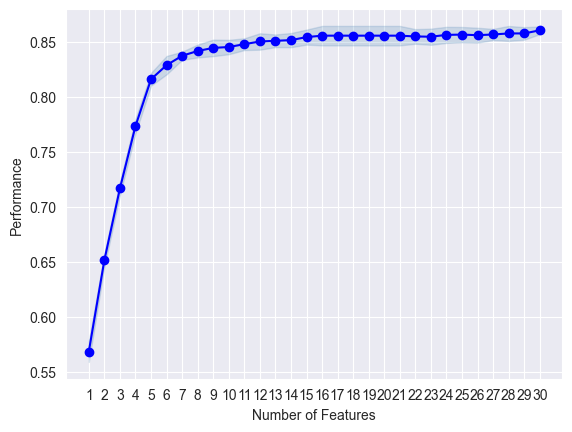

In [234]:
# feature selection 
from mlxtend.feature_selection import SequentialFeatureSelector
from xgboost import XGBClassifier
xgb = XGBClassifier()
sns.set_style('darkgrid')
data, target = df_copy.drop(['Cover_Type'], axis=1), df['Cover_Type']
x1, x2, y1, y2 = train_test_split(data, target)
y1 -= 1
sfs = SequentialFeatureSelector(
                estimator = xgb,
                k_features = 30, 
                forward=True, 
                floating=False,
                scoring='accuracy',
                cv=5,
                verbose=2)
sfs.fit(x1, y1)
fig, axes = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

In [235]:
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.5542328 , 0.58201058, 0.57275132, 0.57142857, 0.56261023]),
  'avg_score': 0.5686067019400352,
  'feature_names': ('Elevation',)},
 2: {'feature_idx': (0, 56),
  'cv_scores': array([0.64153439, 0.65255732, 0.65388007, 0.65917108, 0.65079365]),
  'avg_score': 0.6515873015873016,
  'feature_names': ('Elevation', 'Distance_Roadways_FirPoints')},
 3: {'feature_idx': (0, 5, 56),
  'cv_scores': array([0.71075838, 0.72442681, 0.71472663, 0.72310406, 0.71075838]),
  'avg_score': 0.7167548500881834,
  'feature_names': ('Elevation',
   'Horizontal_Distance_To_Roadways',
   'Distance_Roadways_FirPoints')},
 4: {'feature_idx': (0, 3, 5, 56),
  'cv_scores': array([0.76190476, 0.77601411, 0.78174603, 0.77557319, 0.77160494]),
  'avg_score': 0.77336860670194,
  'feature_names': ('Elevation',
   'Horizontal_Distance_To_Hydrology',
   'Horizontal_Distance_To_Roadways',
   'Distance_Roadways_FirPoints')},
 5: {'feature_idx': (0, 1, 3, 5, 56),
  'cv_score

In [262]:
# Test after feature reduction
cols = ['Elevation',
   'Aspect',
   'Slope',
   'Horizontal_Distance_To_Hydrology',
   'Vertical_Distance_To_Hydrology',
   'Horizontal_Distance_To_Roadways',
   'Horizontal_Distance_To_Fire_Points',
   'Wilderness_Area2',
   'Soil_Type3',
   'Soil_Type4',
   'Soil_Type6',
   'Soil_Type7',
   'Soil_Type8',
   'Soil_Type10',
   'Soil_Type11',
   'Soil_Type15',
   'Soil_Type20',
   'Soil_Type21',
   'Soil_Type25',
   'Soil_Type30',
   'Soil_Type31',
   'Soil_Type33',
   'Soil_Type36',
   'Soil_Type37',
   'Soil_Type38',
   'Soil_Type39']

"""
   
   'Hillshade',
   'Distance_Roadways_FirPoints',
   'Wilderness_Area3_soil',
   'Elevation_FirePoint'
"""
from mlxtend.feature_selection import SequentialFeatureSelector
from xgboost import XGBClassifier
sns.set_style('darkgrid')
df_copy = feature_creat(df.copy().drop(['Id'], axis=1))
data, target = df_copy[cols], df['Cover_Type']
x1, x2, y1, y2 = train_test_split(data, target, random_state=42)
y1 -= 1
y2 -= 1
eval_set = [(x1, y1), (x2, y2)]
xgb = XGBClassifier(eval_metric=['merror', 'mlogloss'])
xgb.fit(x1, y1, eval_set = eval_set, verbose=True)

[0]	validation_0-merror:0.24921	validation_0-mlogloss:1.43511	validation_1-merror:0.27460	validation_1-mlogloss:1.44978
[1]	validation_0-merror:0.23845	validation_0-mlogloss:1.18555	validation_1-merror:0.26614	validation_1-mlogloss:1.21239
[2]	validation_0-merror:0.23192	validation_0-mlogloss:1.02094	validation_1-merror:0.25979	validation_1-mlogloss:1.05894
[3]	validation_0-merror:0.22496	validation_0-mlogloss:0.90306	validation_1-merror:0.25661	validation_1-mlogloss:0.94976
[4]	validation_0-merror:0.21199	validation_0-mlogloss:0.81365	validation_1-merror:0.25265	validation_1-mlogloss:0.86728
[5]	validation_0-merror:0.21014	validation_0-mlogloss:0.74619	validation_1-merror:0.25185	validation_1-mlogloss:0.80525
[6]	validation_0-merror:0.20467	validation_0-mlogloss:0.69218	validation_1-merror:0.24868	validation_1-mlogloss:0.75691
[7]	validation_0-merror:0.20044	validation_0-mlogloss:0.64991	validation_1-merror:0.24259	validation_1-mlogloss:0.71929
[8]	validation_0-merror:0.18845	validati

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

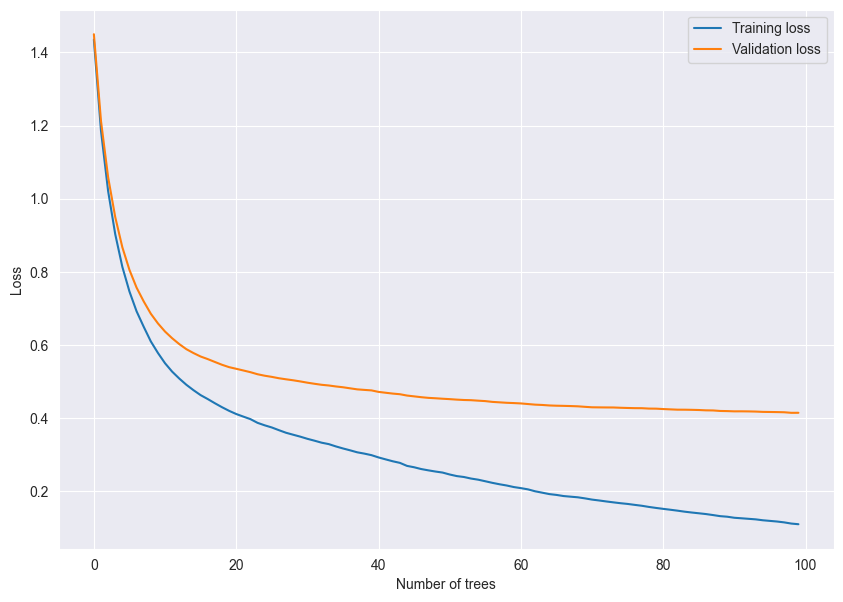

In [263]:
results = xgb.evals_result()
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
# plt.axvline(20, color="gray", label="Optimal tree number")
# plt.ylim(0.01, 0.05)
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [264]:
pred = xgb.predict(x1)
print('train acc: ', accuracy_score(y1, pred))
pred = xgb.predict(x2)
print('test acc: ', accuracy_score(y2, pred))

train acc:  0.9894179894179894
test acc:  0.8492063492063492


In [265]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(xgb, x2, y2, cv=5, scoring='accuracy'))

0.7822751322751322

<Axes: xlabel='Hillshade_3pm', ylabel='Aspect'>

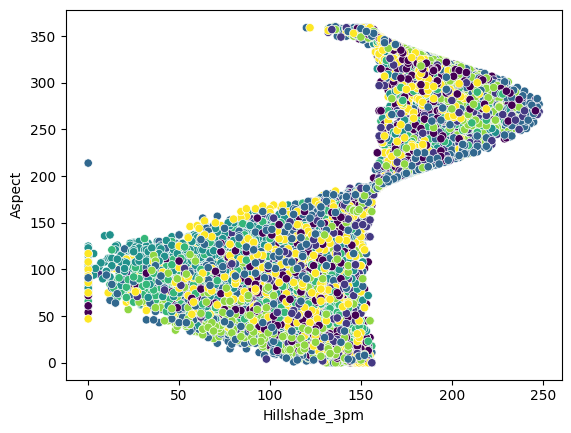

In [111]:
# palette = sns.color_palette("mako", as_cmap=True)
sns.scatterplot(data=df, x='Hillshade_3pm', y='Aspect',c=df['Cover_Type'])

<Axes: xlabel='Hillshade_3pm', ylabel='Hillshade_Noon'>

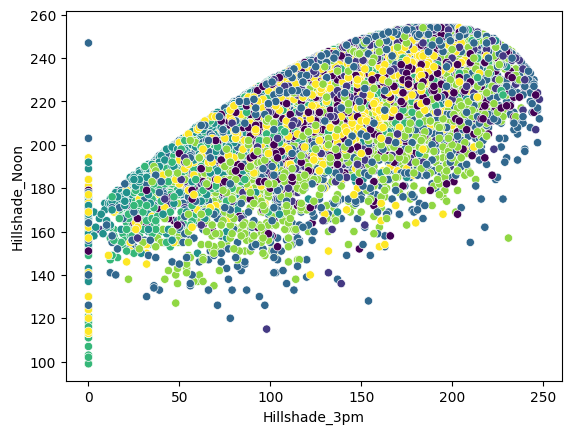

In [113]:
sns.scatterplot(data=df, x='Hillshade_3pm', y='Hillshade_Noon',c=df['Cover_Type'])

<Axes: xlabel='Hillshade_3pm', ylabel='Elevation'>

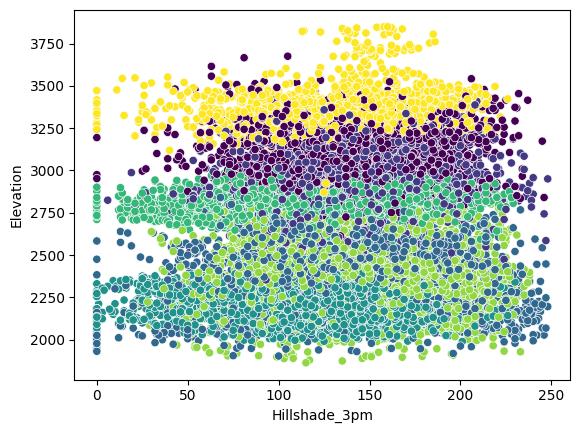

In [115]:
sns.scatterplot(data=df, x='Hillshade_3pm', y='Elevation',c=df['Cover_Type'])

<Axes: xlabel='Elevation', ylabel='Density'>

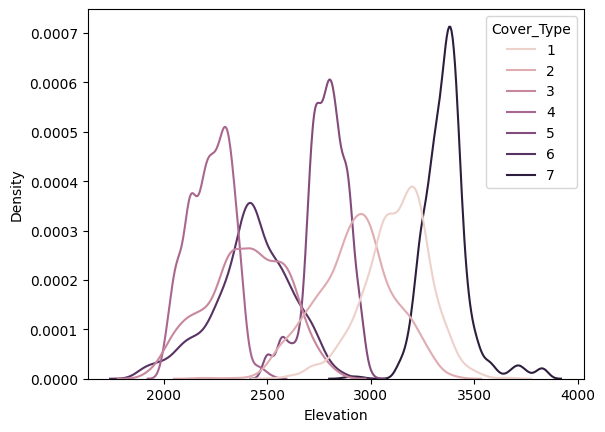

In [119]:
sns.kdeplot(data=df, x='Elevation', hue='Cover_Type')

In [120]:
df.corr().loc['Elevation', 'Cover_Type']

0.016090043818252308

In [132]:
df.corr().loc['Hillshade_3pm', 'Aspect']

0.6350223640198747

In [131]:
df.corr().loc['Wilderness_Area4', 'Soil_Type3']

0.3450692205887012

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ch2_matrix = chi2(df.drop(['Id', 'Cover_Type', 'Vertical_Distance_To_Hydrology'], axis=1), df['Wilderness_Area4'])
print(pd.DataFrame(ch2_matrix))
model1 = SelectKBest(chi2, k=5) 
model1.fit_transform(df.drop(['Id', 'Cover_Type', 'Vertical_Distance_To_Hydrology'], axis=1), df['Wilderness_Area4'])
# print(model1.scores_)
# print(model1.pvalues_)
model1.get_feature_names_out()

In [ ]:
pd.Series(ch2_matrix[0], index=df.columns.drop(['Id', 'Cover_Type', 'Vertical_Distance_To_Hydrology']))

<Axes: xlabel='Vertical_Distance_To_Hydrology', ylabel='Horizontal_Distance_To_Hydrology'>

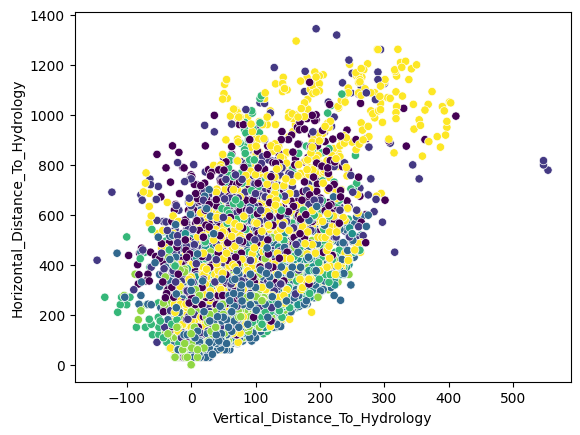

In [86]:
sns.scatterplot(data=df, x='Vertical_Distance_To_Hydrology', y='Horizontal_Distance_To_Hydrology',c=df['Cover_Type'])